In [82]:
import math
import time
import random
from typing import *
from statistics import mean
import matplotlib.pyplot as plt


def plant_model(steering_angle:float, yaw:float, vel:float, x:float, y:float, L=0.365) -> Tuple[float, float, float, float, float]:
    
    start_time = time.time()
    if steering_angle>25:
        steering_angle=25
    elif steering_angle<-25:
        steering_angle=-25
    if vel>25:
        vel=25
    elif vel<-10:
        vel=-10
    steering_angle = -steering_angle*math.pi/180
    yaw = yaw*math.pi/180
    Omega = vel*math.tan(steering_angle)/L    
    x_dot = vel*math.cos(yaw)
    y_dot = vel*math.sin(yaw)
    dt = time.time() - start_time
    yaw = yaw + Omega*dt
    x = x + x_dot*dt
    y = y + y_dot*dt
    vel = math.sqrt(x_dot**2 + y_dot**2)
    yaw = yaw*180/math.pi
    yaw -= math.ceil(yaw / 360 - 0.5) * 360
    
    return vel, yaw, x, y
"""

  Args: 
    Steering Angle in degrees, 
    Theta (yaw w.r.t X-Y Plane) in degrees, 
    Rotations Per Second to calculate current velocity
    (X,Y) current X and Y co-ordinates of the Car

  Returns: 
    Velocity of the car
    Theta is the yaw similar to the input Theta but calculated on the inputs of RPS and Heading Angle and feeding back to the function again
    Omega is the angular velocity of the vehicle derived using Slipping and Heading Angle
    (X,Y) current X and Y co-ordinates of the Car
    dt is the time taken for function to execute

  Notes:
    Theta and Omega obtained are again given as a feedback to calculate X_Dot, Y_Dot, Theta
    Currently Theta is calculated using incremental method by adding the product of Omega and Execution time of the Function

"""
    

'\n\n  Args: \n    Steering Angle in degrees, \n    Theta (yaw w.r.t X-Y Plane) in degrees, \n    Rotations Per Second to calculate current velocity\n    (X,Y) current X and Y co-ordinates of the Car\n\n  Returns: \n    Velocity of the car\n    Theta is the yaw similar to the input Theta but calculated on the inputs of RPS and Heading Angle and feeding back to the function again\n    Omega is the angular velocity of the vehicle derived using Slipping and Heading Angle\n    (X,Y) current X and Y co-ordinates of the Car\n    dt is the time taken for function to execute\n\n  Notes:\n    Theta and Omega obtained are again given as a feedback to calculate X_Dot, Y_Dot, Theta\n    Currently Theta is calculated using incremental method by adding the product of Omega and Execution time of the Function\n\n'

-20.91574861910653
3.8955748904513436
1.07498061690881e-06


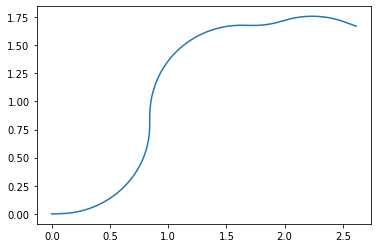

In [24]:
start_time = time.time()
seconds = 4
phi = 0
yaw = 0
rps = 20
x = 0
y = 0
x_list = []
y_list = []
dt_list = []
while True:
    phi = phi+random.randint(-8,8)
    current_time = time.time()
    elapsed_time = current_time - start_time
    vel, yaw, x, y, dt = plant_model(phi, yaw, rps, x, y)
    dt_list.append(dt)
    x_list.append(x)
    y_list.append(y)
    if elapsed_time > seconds:
        break

plt.plot(x_list,y_list)
print(yaw)
print(vel)
print(mean(dt_list))

In [133]:
import numpy as np
import math
import matplotlib.pyplot as plt

class Vehicle:

    def __init__(self,x=0,y=0,yaw=0,v=0,dt=0.1,l = 2.9):
        self.x = x
        self.y = y          # pos x and y
        self.yaw = yaw      # vehicle heading
        self.v = v          # car longitudinal velocity
        self.dt = dt        # sampling time
        self.l = l          # length of vehicle

    def update(self,delta):
        self.x = self.x+self.v*math.cos(self.yaw)*self.dt
        self.y = self.y+self.v*math.sin(self.yaw)*self.dt
        self.yaw = self.yaw + self.v/self.l*math.tan(delta)*self.dt  # delta is the steering angle
    

class PurePursuit:
    def __init__(self, kld = 0.1 , ld=2.0):
        self.kld = kld          #look ahead gain
        self.ld = ld            #look ahead distance

    def targetIndex(self,vehicle,cx,cy):
        dx = [vehicle.x-x for x in cx]
        dy = [vehicle.y-y for y in cy]
        dist = [math.sqrt(diffx**2 + diffy**2) for (diffx,diffy) in zip(dx,dy)]
        index = dist.index(min(dist))
        length = 0.0
        newld = self.kld*vehicle.v + self.ld
        while newld > length and (index+1) < len(cx):
            diffx = cx[index+1]-cx[index]
            diffy = cy[index+1]-cy[index]
            length += math.sqrt(diffx**2+diffy**2)
            index += 1
    
        return index
    
    def purePursuitControl(self,vehicle,cx,cy,cind):

        index = self.targetIndex(vehicle,cx,cy)

        if cind >= index:
            index = cind
        if index < len(cx):
            tx = cx[index]
            ty = cy[index]
        else:
            tx = cx[-1]
            ty = cy[-1]
            index = len(cx)-1

        alpha = math.atan2(ty - vehicle.y,tx - vehicle.x)-vehicle.yaw  #calculate the alpah

        if vehicle.v < 0:
            alpha = math.pi - alpha  #check if the vehilce is backwarding

        newld = self.kld*vehicle.v + self.ld

        delta = math.atan2(2.0*vehicle.l* math.sin(alpha), newld)
        
#         if delta>25*math.pi/180:
#             delta=25*math.pi/180
#         elif delta<-25*math.pi/180:
#             delta=-25*math.pi/180

        return delta,index

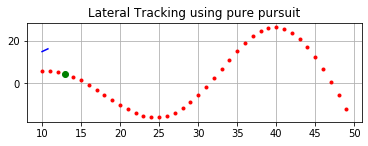

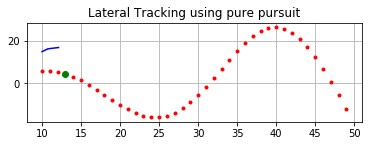

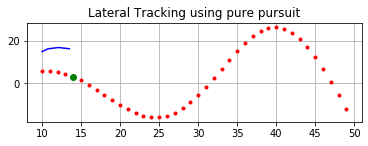

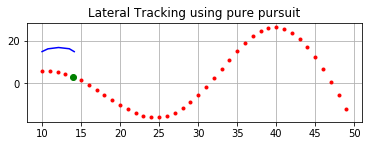

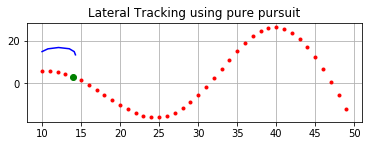

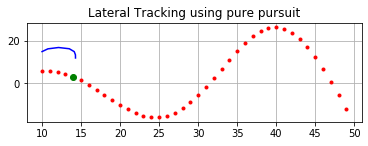

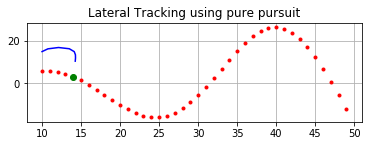

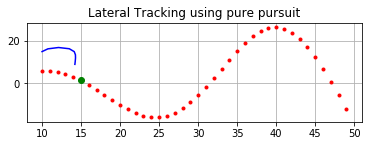

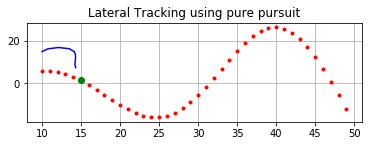

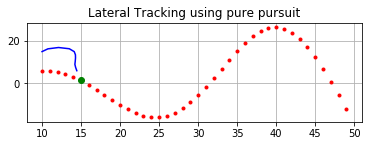

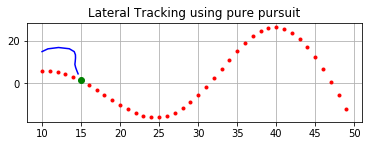

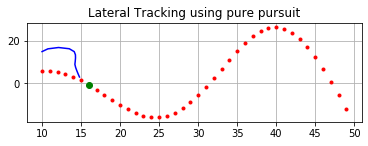

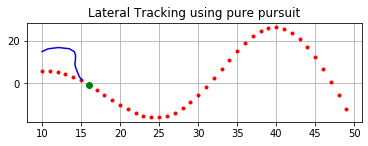

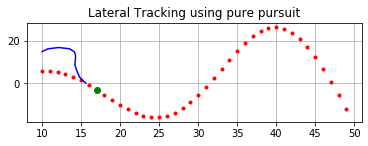

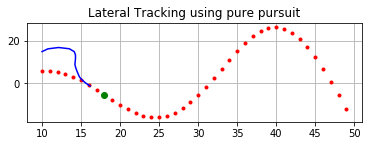

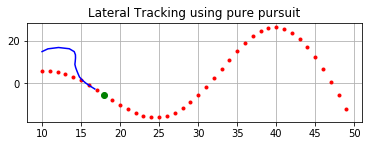

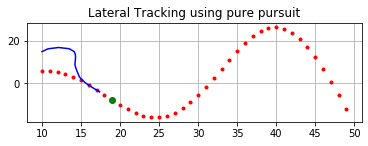

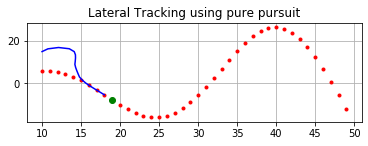

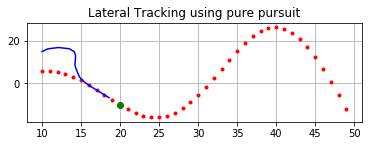

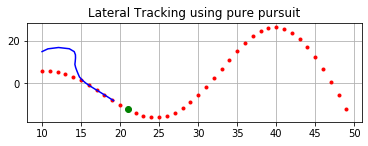

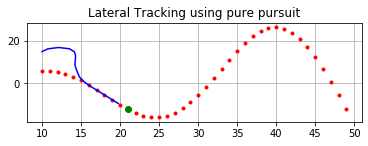

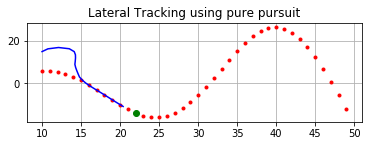

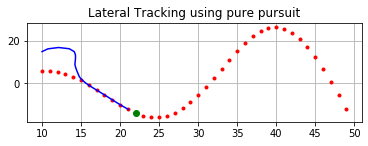

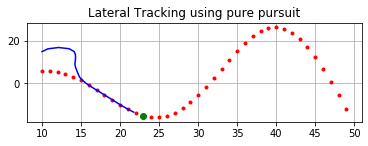

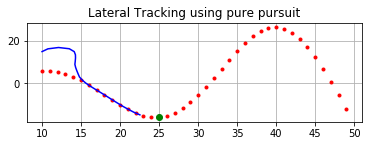

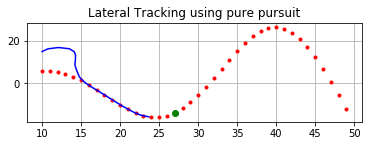

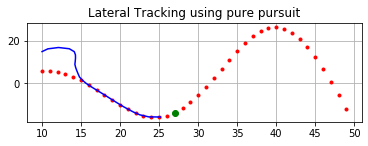

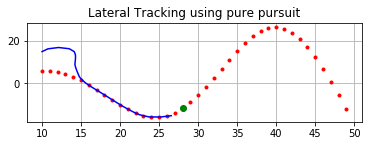

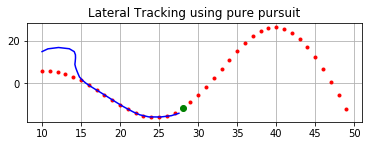

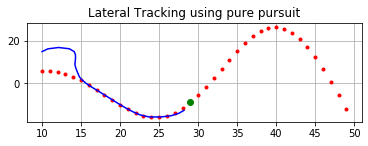

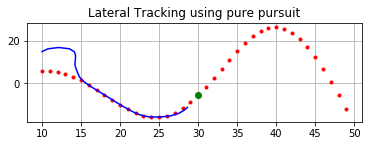

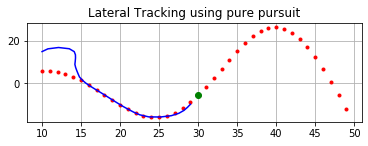

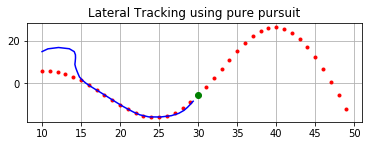

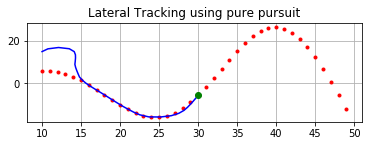

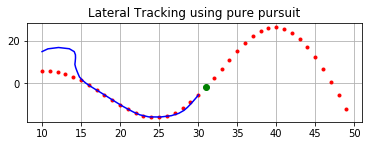

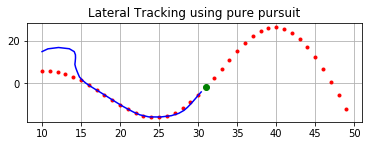

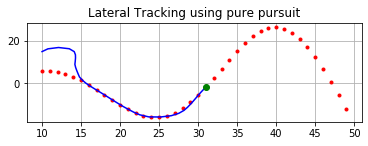

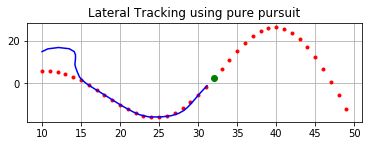

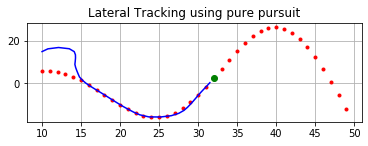

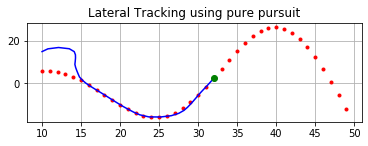

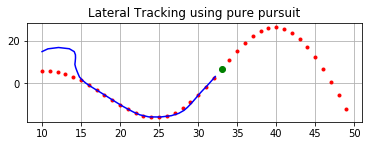

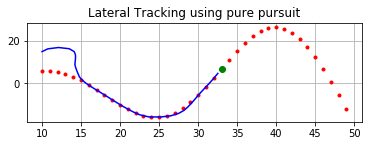

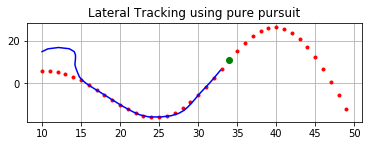

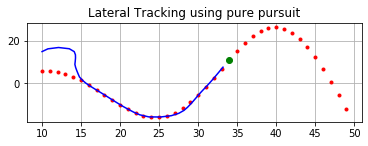

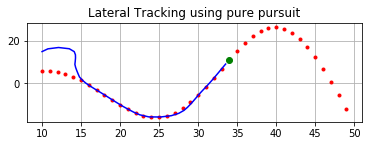

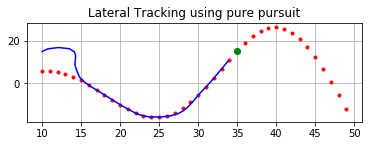

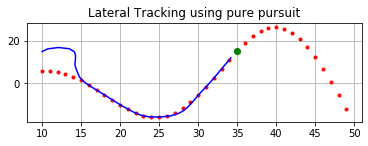

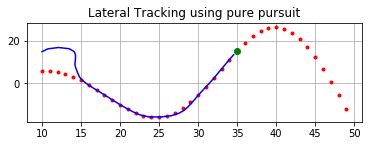

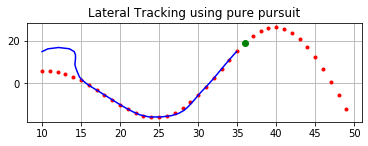

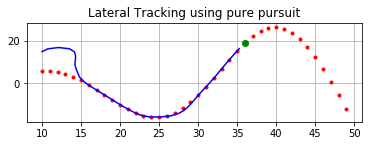

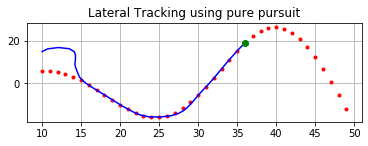

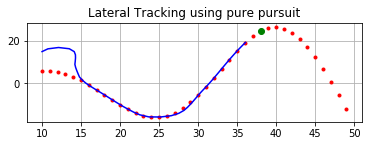

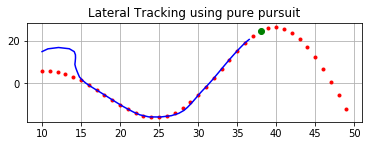

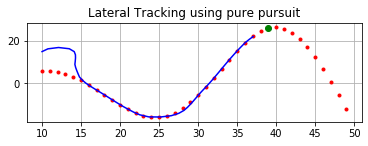

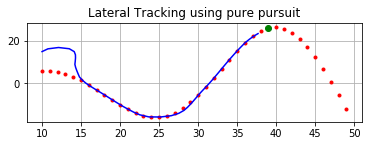

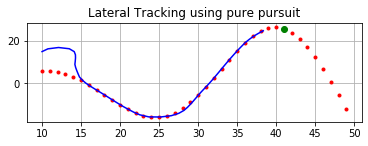

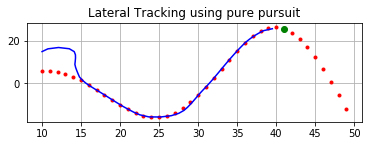

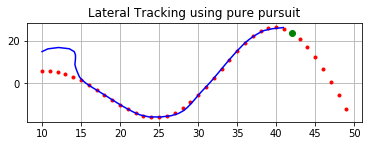

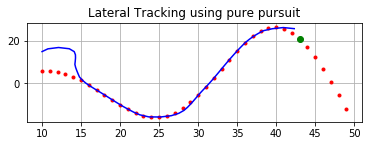

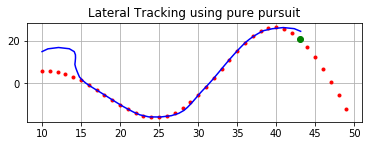

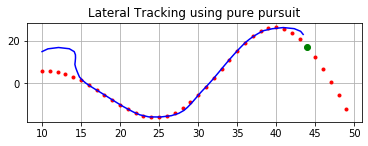

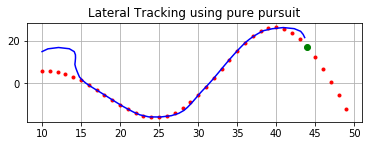

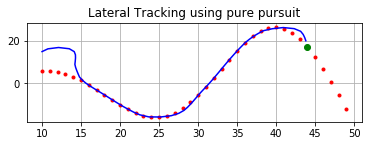

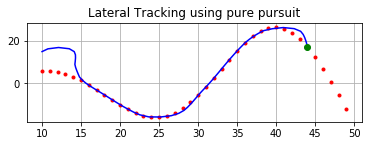

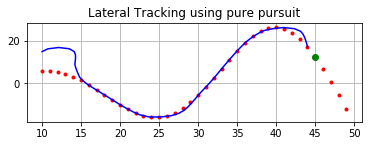

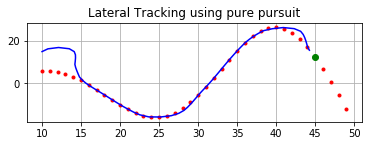

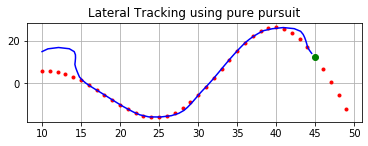

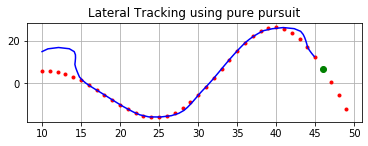

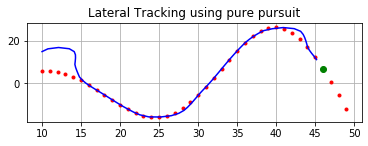

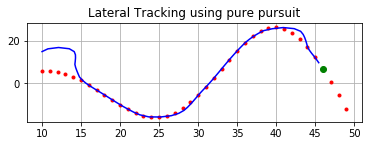

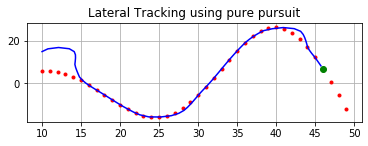

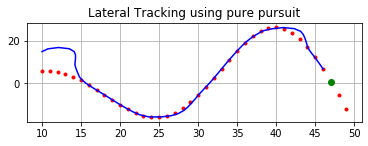

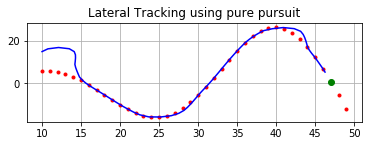

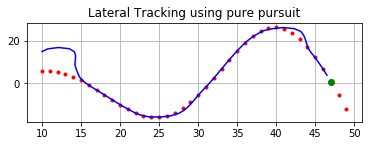

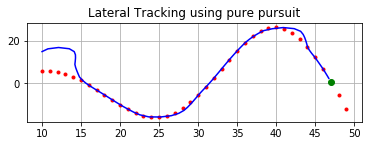

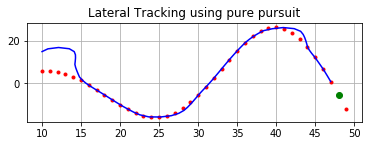

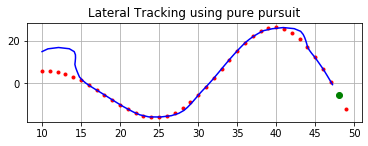

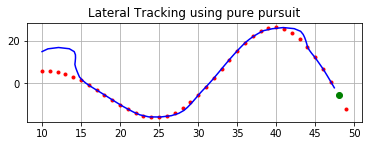

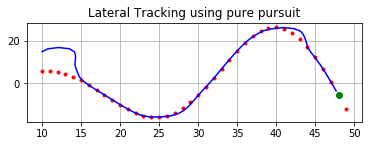

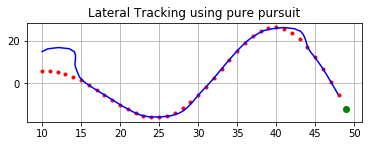

In [134]:
def main():
    # generate path points
    cx = np.arange(10, 50, 1)
    cy = [math.sin(ix / 5.0) * ix / 1.5 for ix in cx]
    T = 100  # maximum running time

    # set the inital car location of vehicle
    vehicle = Vehicle(x=10, y=15, yaw=math.pi/3, v=15)
    lastIndex = len(cx) - 1
    time = 0.0
    x = [vehicle.x]
    y = [vehicle.y]
    yaw = [vehicle.yaw]
    v = [vehicle.v]
    t = [0.0]
#     PIDController = PID(6.0,0.1,0.1)
    PurePursuitController = PurePursuit()

    target_ind = PurePursuitController.targetIndex(vehicle, cx, cy)
    
    

    while T >= time and lastIndex > target_ind:

        di, target_ind = PurePursuitController.purePursuitControl(vehicle,cx,cy,target_ind)
        vehicle.update(di)

        time = time + vehicle.dt

        x.append(vehicle.x)
        y.append(vehicle.y)
        yaw.append(vehicle.yaw)
        v.append(vehicle.v)
        t.append(time)

        
        plt.cla()
        plt.subplot(211)
        plt.plot(cx, cy, ".r", label="course")
        plt.plot(x, y, "-b", label="trajectory")
        plt.plot(cx[target_ind], cy[target_ind], "go", label="target")
        plt.grid(True)
        plt.title("Lateral Tracking using pure pursuit")
        plt.pause(2)
        

if __name__ == '__main__':
    main()